In [102]:
# Dishant Naik
# Course: CS 559 (Machine Learning: Fund & Apps)
# HW 2/Q 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import glob
from matplotlib.pyplot import imshow
import os, sys
from scipy import misc
import imageio
from itertools import chain
import seaborn as sns

In [103]:
print(PIL.__version__)

7.2.0


In [104]:
imgs = []
path = 'face_data'
for a, b, images in os.walk(path):
    for img in images:
        im = list(chain.from_iterable(imageio.imread(os.path.join(path, str(img)))))
        imgs.append(im)
        
imgs = np.array(imgs)

In [105]:
len(imgs)

177

In [106]:
len(imgs[1])

65536

In [107]:
imgTrain, imgTest = imgs[:157], imgs[157:]

print(len(imgTrain))
print(len(imgTest))

157
20


In [108]:
mean = []
n = 157
x = (imgTrain.T).sum(axis = 1)
for i in x:
    tmp = i/n
    mean.append(tmp)
    
len(mean)

65536

In [109]:
def MulImgs(image,n,m):
    total = n*m
    for t in range(n*m):
        im = image[t]
        plt.subplot(n,m, t+1)
        plt.imshow([im[i:i+256] for i in range(0,len(im),256)], cmap='gray')

In [110]:
def recons(test,k,mean,tmp_vh):
    p = np.dot(test, tmp_vh.T)
    pp = mean + np.dot(p[:,0:k], tmp_vh[0:k,:])
    return(pp)

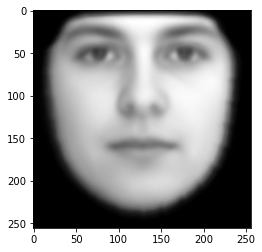

In [111]:
imshow([mean[i:i+256] for i in range(0,len(mean),256)], cmap='gray')
plt.show()

In [112]:
newImg = []
l = len(imgTrain)
for i in range(l):
    tmp = imgTrain[i]
    tmp1 = [tmp[i] - mean[i] for i in range(0, 65536)]
    newImg.append(tmp1)

In [113]:
u, s, vh = np.linalg.svd(newImg, full_matrices=False)

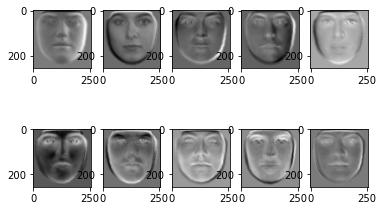

In [129]:
MulImgs(vh[:30],2,5)

In [117]:
def SingImg(image):
    imshow([image[i:i+256] for i in range(0,len(image),256)], cmap='gray')
    plt.show()

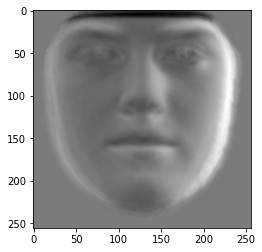

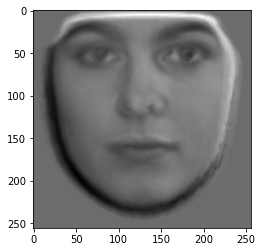

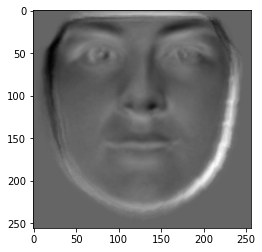

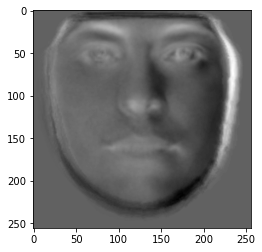

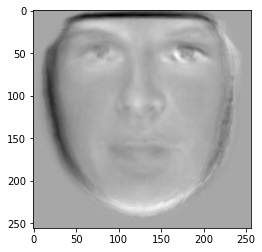

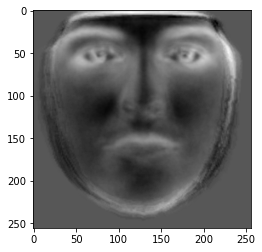

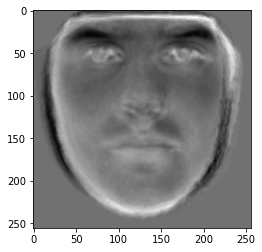

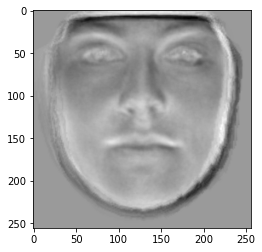

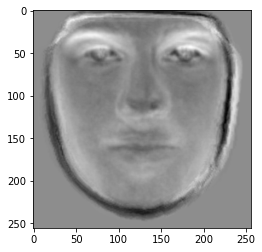

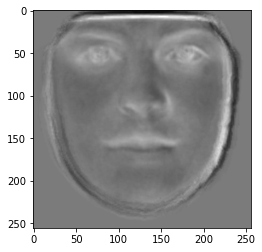

In [118]:
# Printion top 10 Images
for i in range(10):
    SingImg(vh[0:30][i])

In [119]:
newImg_test = []
l = len(imgTest)
for i in range(l):
    tmp = imgTest[i]
    tmp1 = [tmp[i] - mean[i] for i in range(0, 65536)]
    newImg_test.append(tmp1)

In [120]:
reconstruction_30 = recons(newImg_test,30,mean,vh)

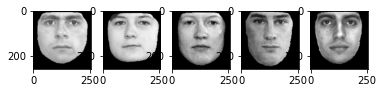

In [121]:
# Test Images
plotMultipleImgs(imgTest,1,5)

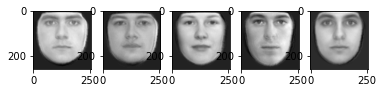

In [122]:
# Reconnected images
plotMultipleImgs(reconstruction_30,1,5)

In [123]:
# Reconstruction error
def reconError(test, recons):
    err = 0
    for i in range(20):
        num = ((np.linalg.norm(test[i]) - np.linalg.norm(recons[i]))**2)/20
        err = err + num
    return err

In [124]:
reconError(imgTest,reconstruction_30)

130362.75020546181

In [125]:
recon_Error = []
ks = [10,30,50,100,150,200]

In [126]:
for i in range(6):
    tmp = recons(newImg_test,ks[i],mean,vh)
    recon_Error.append(reconError(imgTest,tmp))

In [127]:
recon_Error

[256829.40780828835,
 130362.75020546181,
 110255.71777541492,
 85669.63393332243,
 70377.24948368449,
 68704.85647443609]

Text(0, 0.5, 'Reconstruction Error')

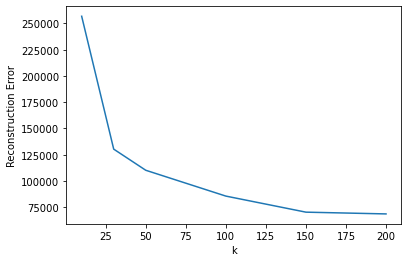

In [128]:
sns.lineplot(ks,recon_Error)
plt.xlabel('k')
plt.ylabel('Reconstruction Error')